In [62]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [63]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [65]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [66]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [67]:
coordinates = list(lat_lngs)

In [68]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [69]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [70]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

port alfred za
hambantota lk
emerald au
soyo ao
juneau us
arraial do cabo br
selaphum th
sentyabrskiy ru
bluff nz
maningrida au
busselton au
ostrovnoy ru
bannu pk
illoqqortoormiut gl
atar mr
mataura pf
skibbereen ie
turukhansk ru
ushuaia ar
hermanus za
padang id
bossangoa cf
hilo us
ilulissat gl
rikitea pf
hilo us
tulucesti ro
salina cruz mx
hilo us
rikitea pf
portland au
amga ru
vaini to
moyale ke
maykain kz
rikitea pf
labuhan id
ushuaia ar
ampanihy mg
russell nz
san diego ph
cape town za
new norfolk au
barrow us
tiksi ru
provideniya ru
faya td
port lincoln au
teya ru
avarua ck
mbandaka cd
bambous virieux mu
ushuaia ar
muravlenko ru
hobart au
pangai to
east london za
taolanaro mg
salalah om
busselton au
vardo no
norrtalje se
hermanus za
bredasdorp za
vaini to
mount gambier au
yamethin mm
albany au
sar-e pul af
cabo san lucas mx
busselton au
langres fr
jamestown sh
barrow us
tobermory gb
isla mujeres mx
beaverlodge ca
fortuna us
kaitangata nz
rikitea pf
port alfred za
paradwip in
new n

hilo us
ouallam ne
hermanus za
saldanha za
tuktoyaktuk ca
la ronge ca
puerto ayora ec
punta arenas cl
ancud cl
yerbogachen ru
mar del plata ar
faanui pf
worland us
mar del plata ar
taolanaro mg
la ronge ca
hobart au
ramos arizpe mx
luena ao
khonuu ru
meyungs pw
sao joao da barra br
katsuura jp
nicoya cr
kapaa us
hobart au
sergeyevka kz
bilma ne
fiumicino it
upernavik gl
ushuaia ar
adrar dz
beringovskiy ru
sangmelima cm
codrington ag
havre-saint-pierre ca
bethel us
san patricio mx
puerto ayora ec
longyearbyen sj
shiyan cn
bataipora br
ostrovnoy ru
wairoa nz
mys shmidta ru
ushuaia ar
clyde river ca
kapaa us
tiznit ma
yellowknife ca
nizhniy kuranakh ru
atuona pf
saint george bm
tuktoyaktuk ca
mataura pf
cape town za
maksatikha ru
mogadishu so
sechura pe
hofn is
shingu jp
vaini to
wuwei cn
arraial do cabo br
nantucket us
dingle ie
tuktoyaktuk ca
gigmoto ph
bandarbeyla so
rikitea pf
rikitea pf
dingle ie
thompson ca
sergeyevka kz
kodiak us
lavrentiya ru
bacuit ph
kaitangata nz
pachino it
len

In [71]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | hambantota
Processing Record 3 of Set 1 | emerald
Processing Record 4 of Set 1 | soyo
Processing Record 5 of Set 1 | juneau
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | selaphum
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | maningrida
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | bannu
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | atar
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | skibbereen
Processing Record 18 of Set 1 | turukhansk
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | padang
Processing Record 22 

Processing Record 36 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 4 | oranjemund
Processing Record 38 of Set 4 | requena
Processing Record 39 of Set 4 | wanning
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | oktyabrskoye
Processing Record 43 of Set 4 | xalpatlahuac
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | ueda
Processing Record 47 of Set 4 | tautira
Processing Record 48 of Set 4 | aripuana
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | riobamba
Processing Record 1 of Set 5 | nishihara
Processing Record 2 of Set 5 | tura
Processing Record 3 of Set 5 | bandarbeyla
Processing Record 4 of Set 5 | charters towers
Processing Record 5 of Set 5 | ginda
Processing Record 6 of Set 5 | babanusah
City not found. Skipping...
Processing Record 7 of Set 5 | shingu
Processing Record 8 of Set 5 

City not found. Skipping...
Processing Record 25 of Set 8 | bushenyi
Processing Record 26 of Set 8 | warqla
City not found. Skipping...
Processing Record 27 of Set 8 | kahului
Processing Record 28 of Set 8 | marcona
City not found. Skipping...
Processing Record 29 of Set 8 | san patricio
Processing Record 30 of Set 8 | ekibastuz
Processing Record 31 of Set 8 | madaoua
Processing Record 32 of Set 8 | cidreira
Processing Record 33 of Set 8 | ingham
Processing Record 34 of Set 8 | genhe
Processing Record 35 of Set 8 | jiexiu
Processing Record 36 of Set 8 | chapais
Processing Record 37 of Set 8 | umea
Processing Record 38 of Set 8 | shenxian
Processing Record 39 of Set 8 | lavrentiya
Processing Record 40 of Set 8 | port hedland
Processing Record 41 of Set 8 | qaqortoq
Processing Record 42 of Set 8 | bagasara
City not found. Skipping...
Processing Record 43 of Set 8 | kruisfontein
Processing Record 44 of Set 8 | bristol
Processing Record 45 of Set 8 | kandrian
Processing Record 46 of Set 8 

Processing Record 10 of Set 12 | rawah
Processing Record 11 of Set 12 | richards bay
Processing Record 12 of Set 12 | nizhniy odes
Processing Record 13 of Set 12 | sumbe
Processing Record 14 of Set 12 | cahabon
Processing Record 15 of Set 12 | caravelas
Processing Record 16 of Set 12 | gualeguay
Processing Record 17 of Set 12 | abu samrah
Processing Record 18 of Set 12 | cascais
Processing Record 19 of Set 12 | palana
Processing Record 20 of Set 12 | dzilam gonzalez
Processing Record 21 of Set 12 | avera
Processing Record 22 of Set 12 | yermakovskoye
Processing Record 23 of Set 12 | salinopolis
Processing Record 24 of Set 12 | markova
Processing Record 25 of Set 12 | mujiayingzi
Processing Record 26 of Set 12 | dwarka
Processing Record 27 of Set 12 | cangzhou
Processing Record 28 of Set 12 | canitas
City not found. Skipping...
Processing Record 29 of Set 12 | inirida
Processing Record 30 of Set 12 | gawler
Processing Record 31 of Set 12 | muhos
Processing Record 32 of Set 12 | teno
Pro

In [72]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,58.17,65,0,8.30,ZA,2022-08-01 15:38:27
1,Hambantota,6.1241,81.1185,77.34,94,75,2.30,LK,2022-08-01 15:38:28
2,Emerald,-23.5333,148.1667,54.34,86,61,8.08,AU,2022-08-01 15:38:28
3,Soyo,-6.1349,12.3689,72.90,74,63,12.84,AO,2022-08-01 15:38:28
4,Juneau,58.3019,-134.4197,58.84,97,75,3.44,US,2022-08-01 15:38:29
5,Arraial Do Cabo,-22.9661,-42.0278,76.96,61,0,14.97,BR,2022-08-01 15:38:29
6,Selaphum,16.0299,103.9383,78.31,89,96,6.82,TH,2022-08-01 15:38:30
7,Bluff,-46.6000,168.3333,52.00,72,65,21.00,NZ,2022-08-01 15:38:30
8,Maningrida,-12.0667,134.2667,67.80,88,84,8.48,AU,2022-08-01 15:38:31
9,Busselton,-33.6500,115.3333,53.56,72,76,35.66,AU,2022-08-01 15:38:31


In [73]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-08-01 15:38:27,-33.5906,26.8910,58.17,65,0,8.30
1,Hambantota,LK,2022-08-01 15:38:28,6.1241,81.1185,77.34,94,75,2.30
2,Emerald,AU,2022-08-01 15:38:28,-23.5333,148.1667,54.34,86,61,8.08
3,Soyo,AO,2022-08-01 15:38:28,-6.1349,12.3689,72.90,74,63,12.84
4,Juneau,US,2022-08-01 15:38:29,58.3019,-134.4197,58.84,97,75,3.44
5,Arraial Do Cabo,BR,2022-08-01 15:38:29,-22.9661,-42.0278,76.96,61,0,14.97
6,Selaphum,TH,2022-08-01 15:38:30,16.0299,103.9383,78.31,89,96,6.82
7,Bluff,NZ,2022-08-01 15:38:30,-46.6000,168.3333,52.00,72,65,21.00
8,Maningrida,AU,2022-08-01 15:38:31,-12.0667,134.2667,67.80,88,84,8.48
9,Busselton,AU,2022-08-01 15:38:31,-33.6500,115.3333,53.56,72,76,35.66


In [74]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [75]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

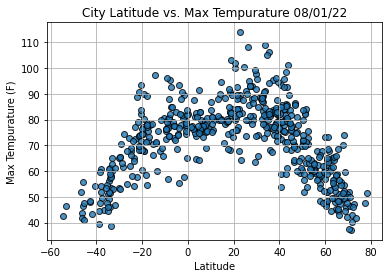

In [76]:
#Import time module
import time

#Build the scatter plot for lat vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#Incorpurate the other graph properties
plt.title(f'City Latitude vs. Max Tempurature '+ time.strftime("%x"))
plt.ylabel('Max Tempurature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

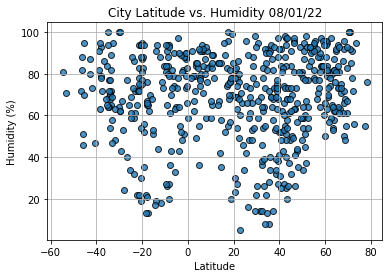

In [77]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

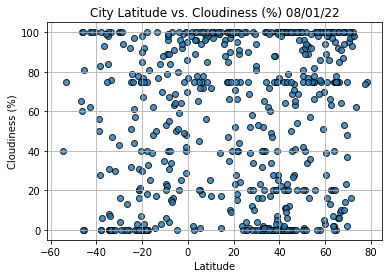

In [78]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

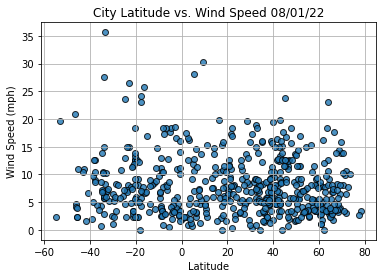

In [81]:
 #Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [93]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [95]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
550     True
551     True
552     True
553    False
554    False
Name: Lat, Length: 555, dtype: bool

In [96]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hambantota,LK,2022-08-01 15:38:28,6.1241,81.1185,77.34,94,75,2.30
4,Juneau,US,2022-08-01 15:38:29,58.3019,-134.4197,58.84,97,75,3.44
6,Selaphum,TH,2022-08-01 15:38:30,16.0299,103.9383,78.31,89,96,6.82
10,Ostrovnoy,RU,2022-08-01 15:38:31,68.0531,39.5131,54.63,92,100,8.32
11,Bannu,PK,2022-08-01 15:38:32,32.9854,70.6027,89.13,54,52,7.72


In [97]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

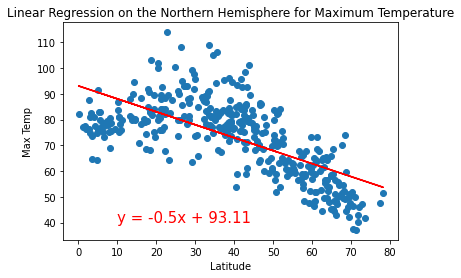

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

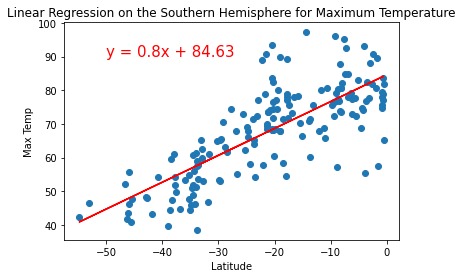

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,90))


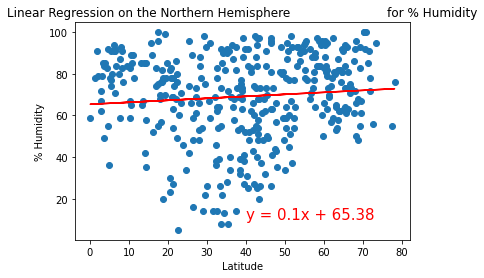

In [121]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

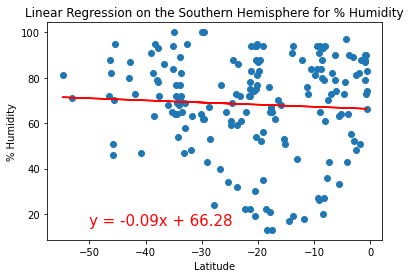

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

In [124]:
linregress(x_values, y_values)

LinregressResult(slope=-0.09342418051612561, intercept=66.27512864037611, rvalue=-0.057397619162587954, pvalue=0.45319843241558067, stderr=0.12426556357647424, intercept_stderr=3.066381886224661)

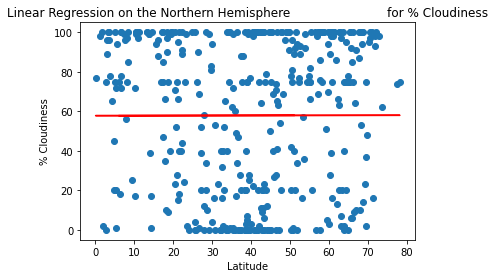

In [127]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [128]:
linregress(x_values, y_values)

LinregressResult(slope=0.00196831982263847, intercept=57.81979029679205, rvalue=0.000991749461093437, pvalue=0.9845857924305684, stderr=0.10181263585696758, intercept_stderr=4.497795565493795)

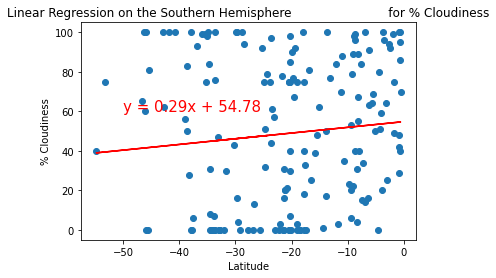

In [129]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [130]:
linregress(x_values, y_values)

LinregressResult(slope=0.2883414665947216, intercept=54.776585388563674, rvalue=0.1025973718964573, pvalue=0.17920005885881865, stderr=0.21378388091284115, intercept_stderr=5.275339371027908)

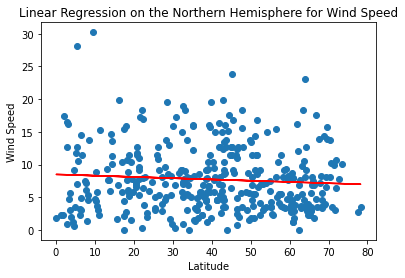

In [132]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed',(40,35))

In [133]:
linregress(x_values, y_values)

LinregressResult(slope=-0.019280425474163285, intercept=8.492578413502747, rvalue=-0.07530845210749315, pvalue=0.14179117618014772, stderr=0.013096223187369978, intercept_stderr=0.578554263732271)

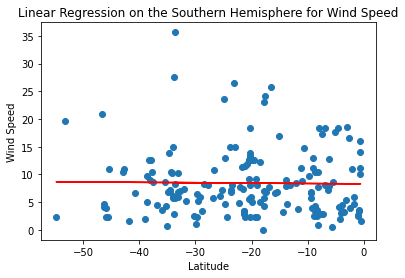

In [134]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Wind Speed',(40,35))

In [135]:
linregress(x_values, y_values)

LinregressResult(slope=-0.00699142306854391, intercept=8.306880791958891, rvalue=-0.015583366574934334, pvalue=0.8387492332020732, stderr=0.03430469025603872, intercept_stderr=0.8465038727235885)